## LAYER ACTIVATIONS VARIANCE BASED ON CONCEPT EXAMPLES

In [33]:
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [34]:
def get_and_save_activation_variances(base_dir, env_name):
    file_info = []
    for approach in sorted(os.listdir(base_dir)):
        approach_dir = os.path.join(base_dir, approach)
        if not os.path.isdir(approach_dir):
            continue
        
        for concept in sorted(os.listdir(approach_dir)):
            concept_dir = os.path.join(approach_dir, concept)
            if not os.path.isdir(concept_dir):
                continue
            
            for layer_name in sorted(os.listdir(concept_dir)):
                layer_dir = os.path.join(concept_dir, layer_name)
                if not os.path.isdir(layer_dir):
                    continue
                
                npy_files = sorted(f for f in os.listdir(layer_dir) if f.endswith(".npy"))
                
                for npy_file in npy_files:
                    npy_path = os.path.join(layer_dir, npy_file)
                    file_info.append((approach, concept, layer_name, npy_file, npy_path))

    data_rows = []
    for (approach, concept, layer_name, npy_file, npy_path) in tqdm(file_info, desc="Computing variances"):
        activations = np.load(npy_path)
        
        var_value = np.var(activations)
        
        data_rows.append({
            "approach": approach,
            "concept": concept,
            "layer": layer_name,
            "filename": npy_file,
            "variance": var_value
        })

    df = pd.DataFrame(data_rows)
    output_csv_path = f"{env_name}_activation_variances.csv"
    df.to_csv(output_csv_path, index=False)
    print(f"Saved variance results to {output_csv_path}")

In [35]:
def compute_activation_variance_stats(df, group_by_cols=['approach']):
    stats = df.groupby(group_by_cols)['variance'].agg(['mean', 'median', 'std']).reset_index()
    return stats

### Compute varances of activations

In [ ]:


gc_base_dir = "/Volumes/MemoryBrick/MSc/rl_tcav_data/concept_example_layer_activations/gem_collector/model_denim-sweep-56"
mc_base_dir = "/Volumes/MemoryBrick/MSc/rl_tcav_data/concept_example_layer_activations/minecart_counter/model_kind-cosmos-35"
grm_base_dir = "/Volumes/MemoryBrick/MSc/rl_tcav_data/concept_example_layer_activations/gold_run_mini/model_firm-mountain-13"

for base_dir, env_name in [(gc_base_dir, "gem_collector"), (mc_base_dir, "minecart_counter"), (grm_base_dir, "gold_run_mini")]:
    get_and_save_activation_variances(base_dir=base_dir, env_name=env_name)

### GemCollector layer activation variance based on concept examples and approach

Summary Statistics by Approach, GemCollector:
                                approach      mean    median       std
0               model_of_interest_greedy  0.003153  0.001831  0.005665
1   model_of_interest_greedy_epsilon0.05  0.003184  0.001832  0.005285
2              more_capable_model_greedy  0.002149  0.001826  0.002293
3  more_capable_model_greedy_epsilon0.05  0.003008  0.001837  0.004558
4                          random_policy  0.004034  0.001844  0.008543


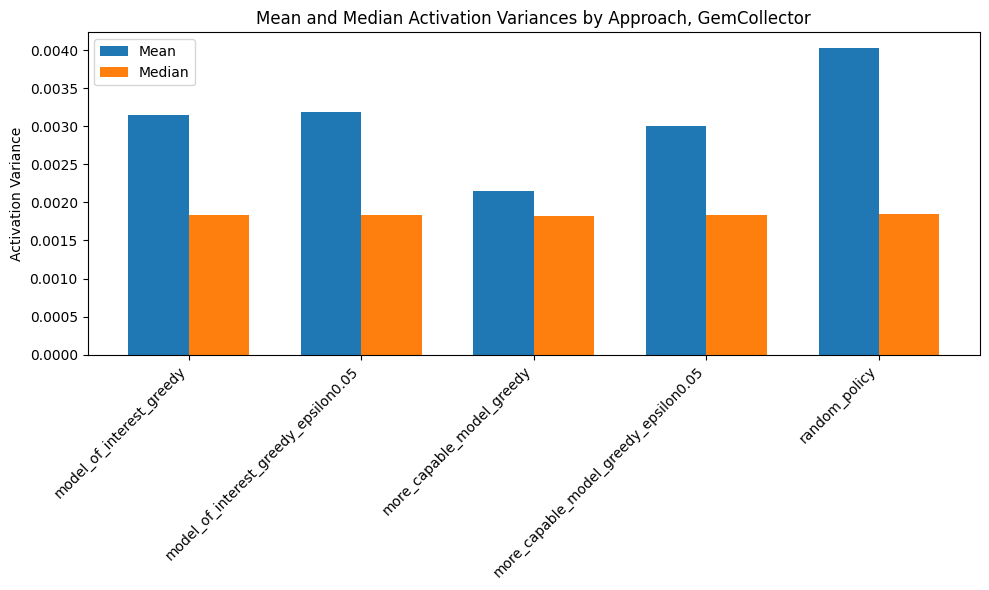

In [36]:
df = pd.read_csv("gem_collector_activation_variances.csv")

summary_stats = compute_activation_variance_stats(df, group_by_cols=['approach'])

print("Summary Statistics by Approach, GemCollector:")
print(summary_stats)

approaches = summary_stats['approach']
mean_values = summary_stats['mean']
median_values = summary_stats['median']

x = np.arange(len(approaches)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mean_values, width, label='Mean')
rects2 = ax.bar(x + width/2, median_values, width, label='Median')

ax.set_ylabel('Activation Variance')
ax.set_title('Mean and Median Activation Variances by Approach, GemCollector')
ax.set_xticks(x)
ax.set_xticklabels(approaches, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()


Summary Statistics by Approach and Concept:
                                 approach                           concept  \
0                model_of_interest_greedy  concept_aquamarine_left_negative   
1                model_of_interest_greedy  concept_aquamarine_left_positive   
2                model_of_interest_greedy     concept_lava_1_above_negative   
3                model_of_interest_greedy     concept_lava_1_above_positive   
4    model_of_interest_greedy_epsilon0.05  concept_aquamarine_left_negative   
5    model_of_interest_greedy_epsilon0.05  concept_aquamarine_left_positive   
6    model_of_interest_greedy_epsilon0.05     concept_lava_1_above_negative   
7    model_of_interest_greedy_epsilon0.05     concept_lava_1_above_positive   
8               more_capable_model_greedy  concept_aquamarine_left_negative   
9               more_capable_model_greedy  concept_aquamarine_left_positive   
10              more_capable_model_greedy     concept_lava_1_above_negative   
11  more

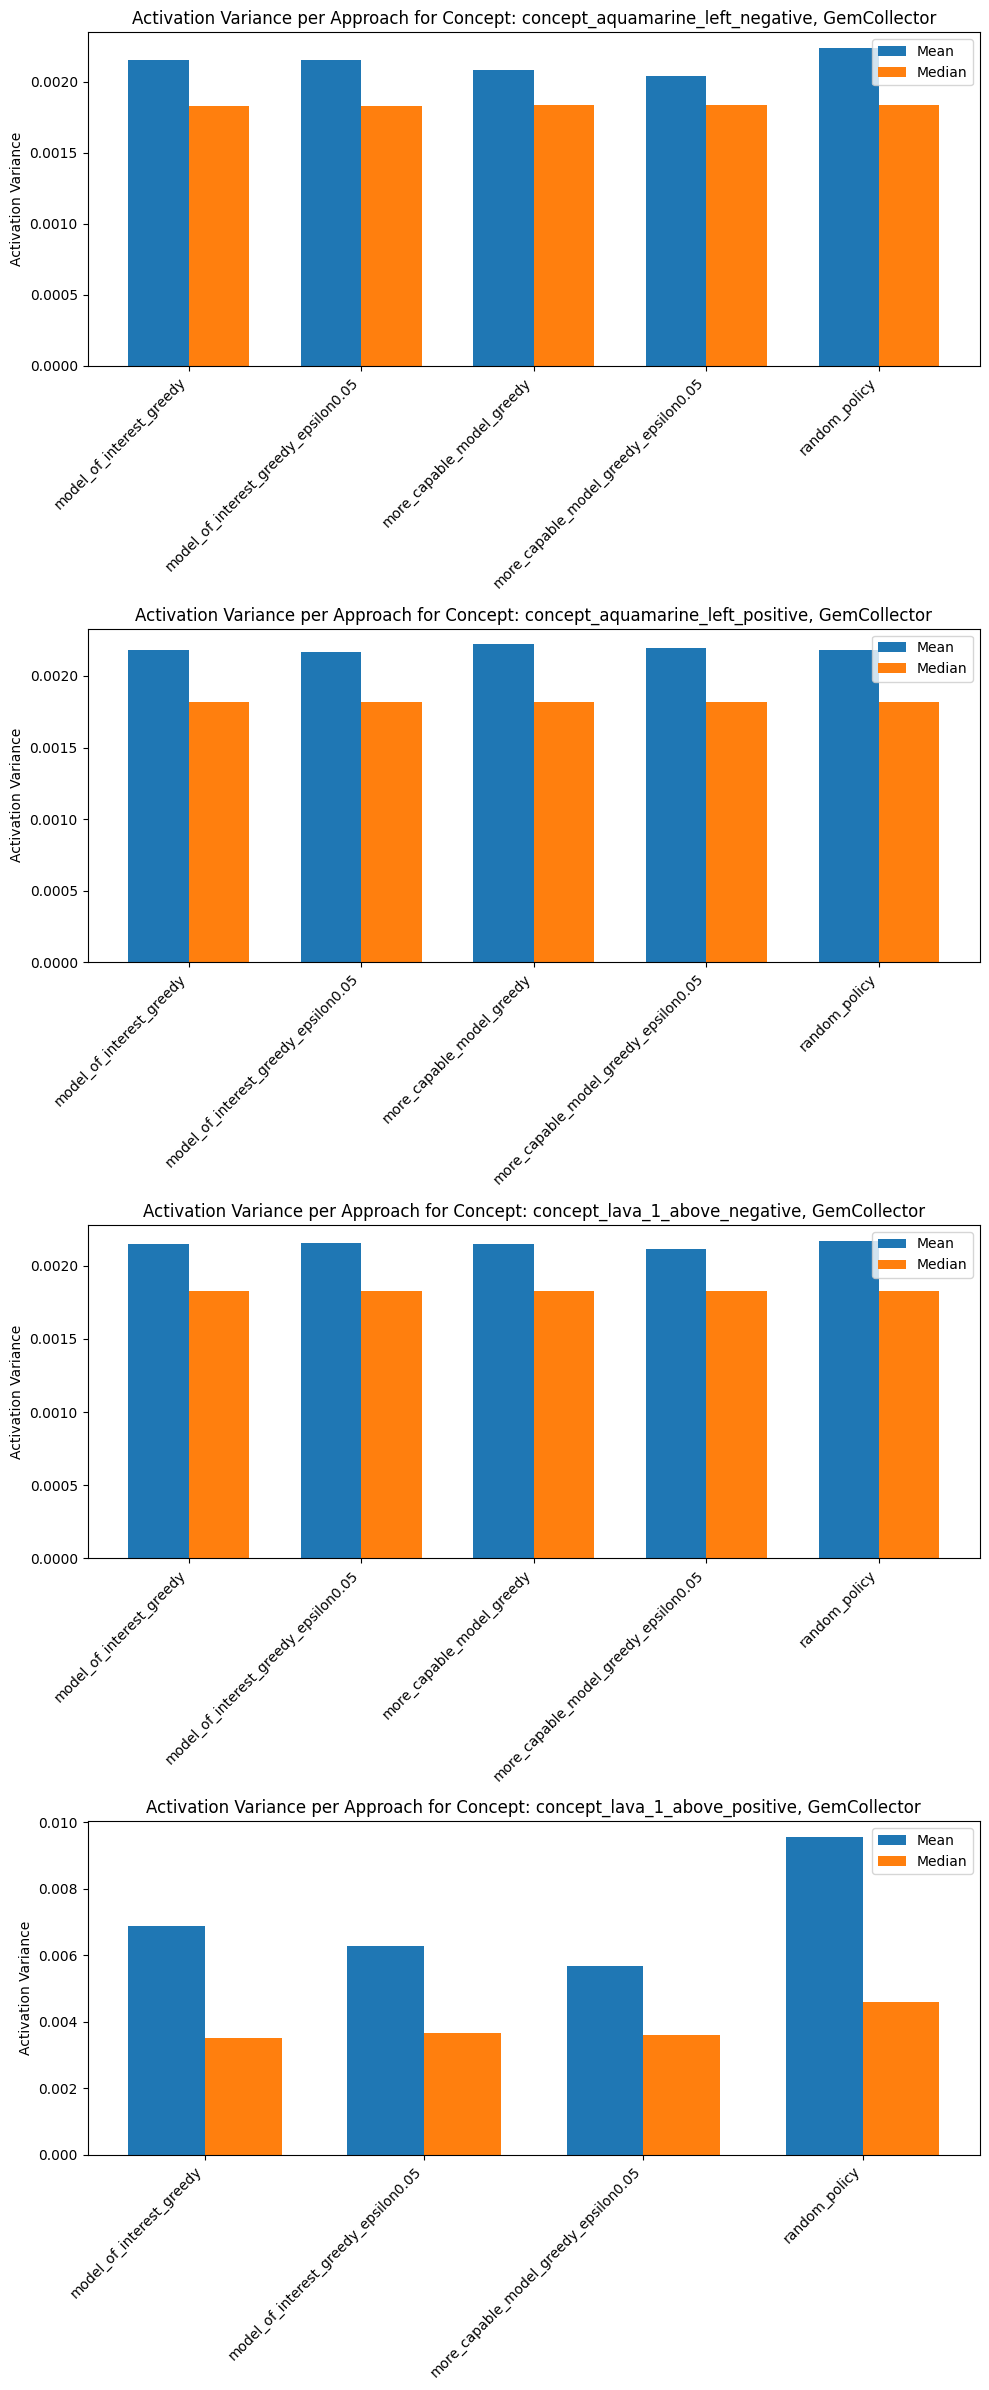

In [37]:
summary_stats = compute_activation_variance_stats(df, group_by_cols=['approach', 'concept'])
print("Summary Statistics by Approach and Concept:")
print(summary_stats)

concepts = summary_stats['concept'].unique()
num_concepts = len(concepts)

fig, axes = plt.subplots(num_concepts, 1, figsize=(10, 6 * num_concepts), squeeze=False)
axes = axes.flatten()

for ax, concept in zip(axes, concepts):
    data = summary_stats[summary_stats['concept'] == concept]
    approaches = data['approach']
    mean_values = data['mean']
    median_values = data['median']
    
    x = np.arange(len(approaches))  
    width = 0.35  
    
    ax.bar(x - width/2, mean_values, width, label='Mean')
    ax.bar(x + width/2, median_values, width, label='Median')
    
    ax.set_title(f"Activation Variance per Approach for Concept: {concept}, GemCollector")
    ax.set_xticks(x)
    ax.set_xticklabels(approaches, rotation=45, ha='right')
    ax.set_ylabel("Activation Variance")
    ax.legend()

plt.tight_layout()
plt.show()

### MinecartCounter layer activation variance based on concept examples and approach

Summary Statistics by Approach, MinecartCounter:
                                approach      mean    median       std
0               model_of_interest_greedy  0.011491  0.006178  0.012053
1   model_of_interest_greedy_epsilon0.05  0.011178  0.006129  0.011255
2              more_capable_model_greedy  0.010905  0.006032  0.010719
3  more_capable_model_greedy_epsilon0.05  0.010861  0.006018  0.010723
4                          random_policy  0.010477  0.005785  0.010437


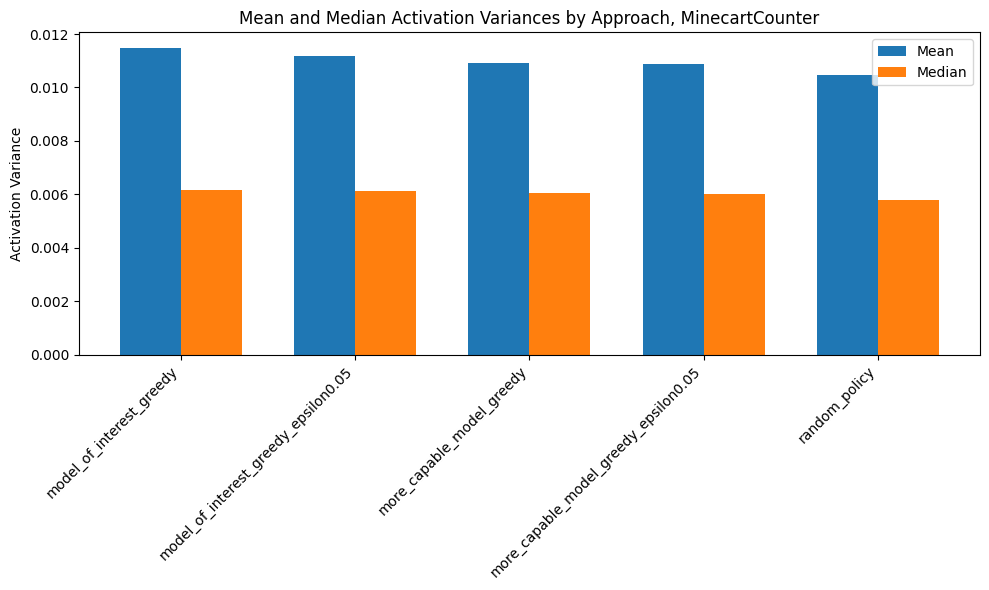

In [ ]:
df = pd.read_csv("minecart_counter_activation_variances.csv")

summary_stats = compute_activation_variance_stats(df, group_by_cols=['approach'])

print("Summary Statistics by Approach, MinecartCounter:")
print(summary_stats)

approaches = summary_stats['approach']
mean_values = summary_stats['mean']
median_values = summary_stats['median']

x = np.arange(len(approaches)) 
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mean_values, width, label='Mean')
rects2 = ax.bar(x + width/2, median_values, width, label='Median')

# Add labels and title
ax.set_ylabel('Activation Variance')
ax.set_title('Mean and Median Activation Variances by Approach, MinecartCounter')
ax.set_xticks(x)
ax.set_xticklabels(approaches, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()

Summary Statistics by Approach and Concept:
                                 approach                           concept  \
0                model_of_interest_greedy  concept_minecart_1_left_negative   
1                model_of_interest_greedy  concept_minecart_1_left_positive   
2                model_of_interest_greedy                concept_minecart_n   
3    model_of_interest_greedy_epsilon0.05  concept_minecart_1_left_negative   
4    model_of_interest_greedy_epsilon0.05  concept_minecart_1_left_positive   
5    model_of_interest_greedy_epsilon0.05                concept_minecart_n   
6               more_capable_model_greedy  concept_minecart_1_left_negative   
7               more_capable_model_greedy  concept_minecart_1_left_positive   
8               more_capable_model_greedy                concept_minecart_n   
9   more_capable_model_greedy_epsilon0.05  concept_minecart_1_left_negative   
10  more_capable_model_greedy_epsilon0.05  concept_minecart_1_left_positive   
11  more

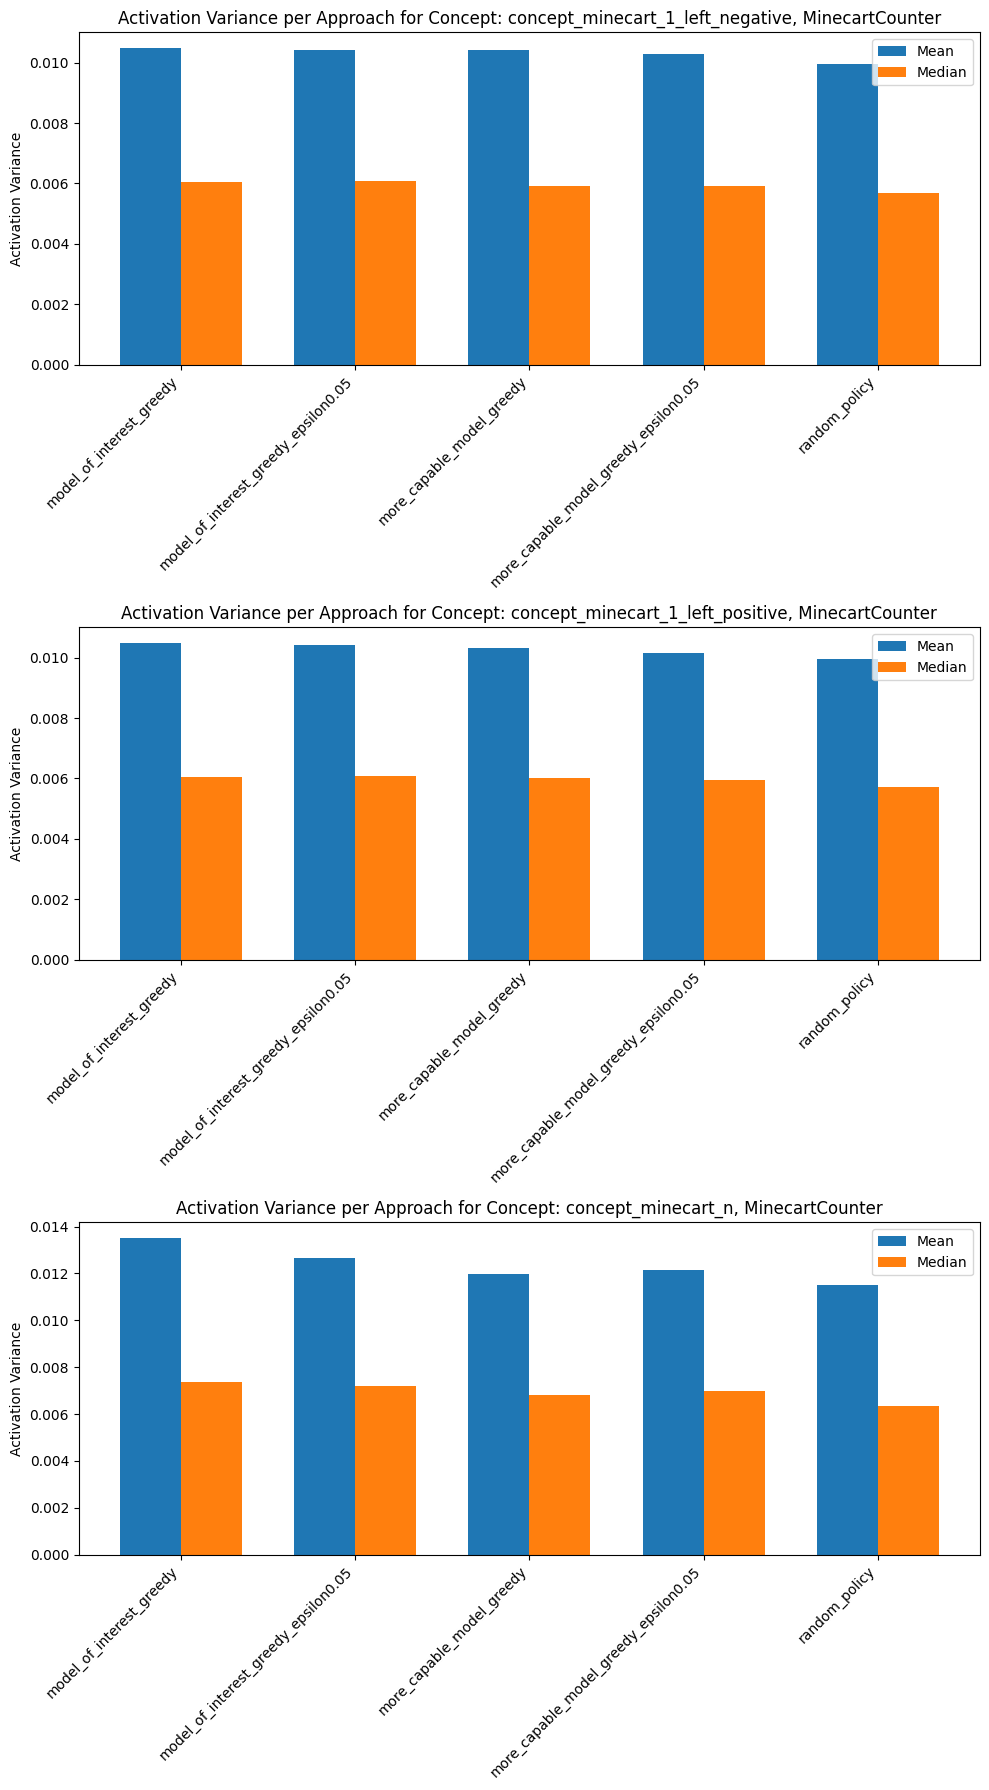

In [39]:
summary_stats = compute_activation_variance_stats(df, group_by_cols=['approach', 'concept'])
print("Summary Statistics by Approach and Concept:")
print(summary_stats)

concepts = summary_stats['concept'].unique()
num_concepts = len(concepts)

fig, axes = plt.subplots(num_concepts, 1, figsize=(10, 6 * num_concepts), squeeze=False)
axes = axes.flatten()

for ax, concept in zip(axes, concepts):
    data = summary_stats[summary_stats['concept'] == concept]
    approaches = data['approach']
    mean_values = data['mean']
    median_values = data['median']
    
    x = np.arange(len(approaches))  
    width = 0.35  
    
    ax.bar(x - width/2, mean_values, width, label='Mean')
    ax.bar(x + width/2, median_values, width, label='Median')
    
    ax.set_title(f"Activation Variance per Approach for Concept: {concept}, MinecartCounter")
    ax.set_xticks(x)
    ax.set_xticklabels(approaches, rotation=45, ha='right')
    ax.set_ylabel("Activation Variance")
    ax.legend()

plt.tight_layout()
plt.show()

### GoldRun layer activation variance based on concept examples and approach

Summary Statistics by Approach, GoldRun:
                                approach      mean    median       std
0               model_of_interest_greedy  0.004423  0.005220  0.003981
1   model_of_interest_greedy_epsilon0.05  0.004797  0.005450  0.004666
2              more_capable_model_greedy  0.005437  0.004254  0.006756
3  more_capable_model_greedy_epsilon0.05  0.005158  0.003862  0.006335
4                          random_policy  0.003834  0.004647  0.003441


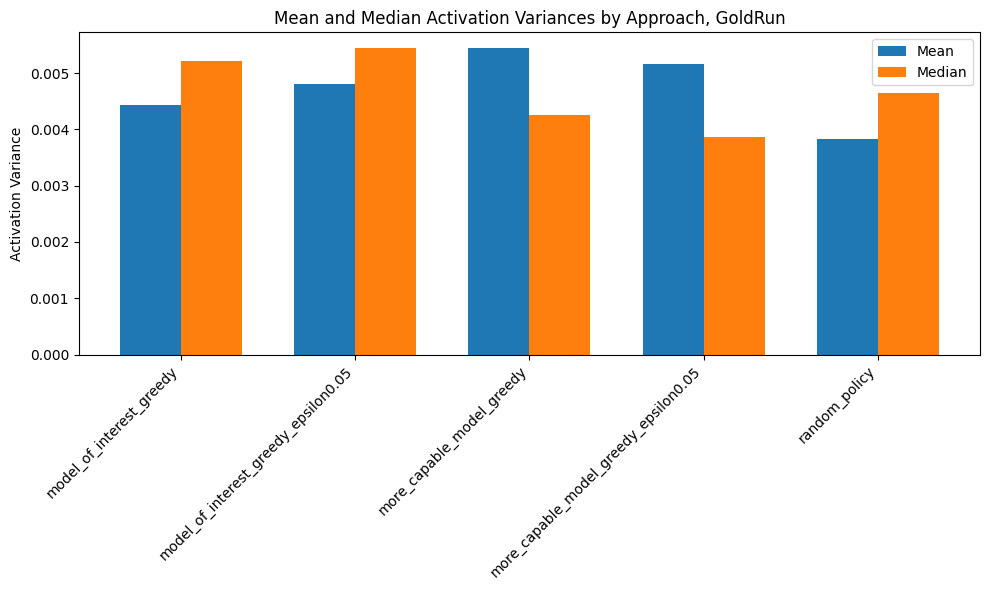

In [ ]:
df = pd.read_csv("gold_run_mini_activation_variances.csv")

summary_stats = compute_activation_variance_stats(df, group_by_cols=['approach'])

print("Summary Statistics by Approach, GoldRun:")
print(summary_stats)

approaches = summary_stats['approach']
mean_values = summary_stats['mean']
median_values = summary_stats['median']

x = np.arange(len(approaches))  
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mean_values, width, label='Mean')
rects2 = ax.bar(x + width/2, median_values, width, label='Median')

# Add labels and title
ax.set_ylabel('Activation Variance')
ax.set_title('Mean and Median Activation Variances by Approach, GoldRun')
ax.set_xticks(x)
ax.set_xticklabels(approaches, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()

Summary Statistics by Approach and Concept:
                                 approach                        concept  \
0                model_of_interest_greedy    concept_gold_above_negative   
1                model_of_interest_greedy    concept_gold_above_positive   
2                model_of_interest_greedy  concept_lava_1_above_negative   
3    model_of_interest_greedy_epsilon0.05    concept_gold_above_negative   
4    model_of_interest_greedy_epsilon0.05    concept_gold_above_positive   
5    model_of_interest_greedy_epsilon0.05  concept_lava_1_above_negative   
6    model_of_interest_greedy_epsilon0.05  concept_lava_1_above_positive   
7               more_capable_model_greedy    concept_gold_above_negative   
8               more_capable_model_greedy    concept_gold_above_positive   
9               more_capable_model_greedy  concept_lava_1_above_negative   
10              more_capable_model_greedy  concept_lava_1_above_positive   
11  more_capable_model_greedy_epsilon0.05   

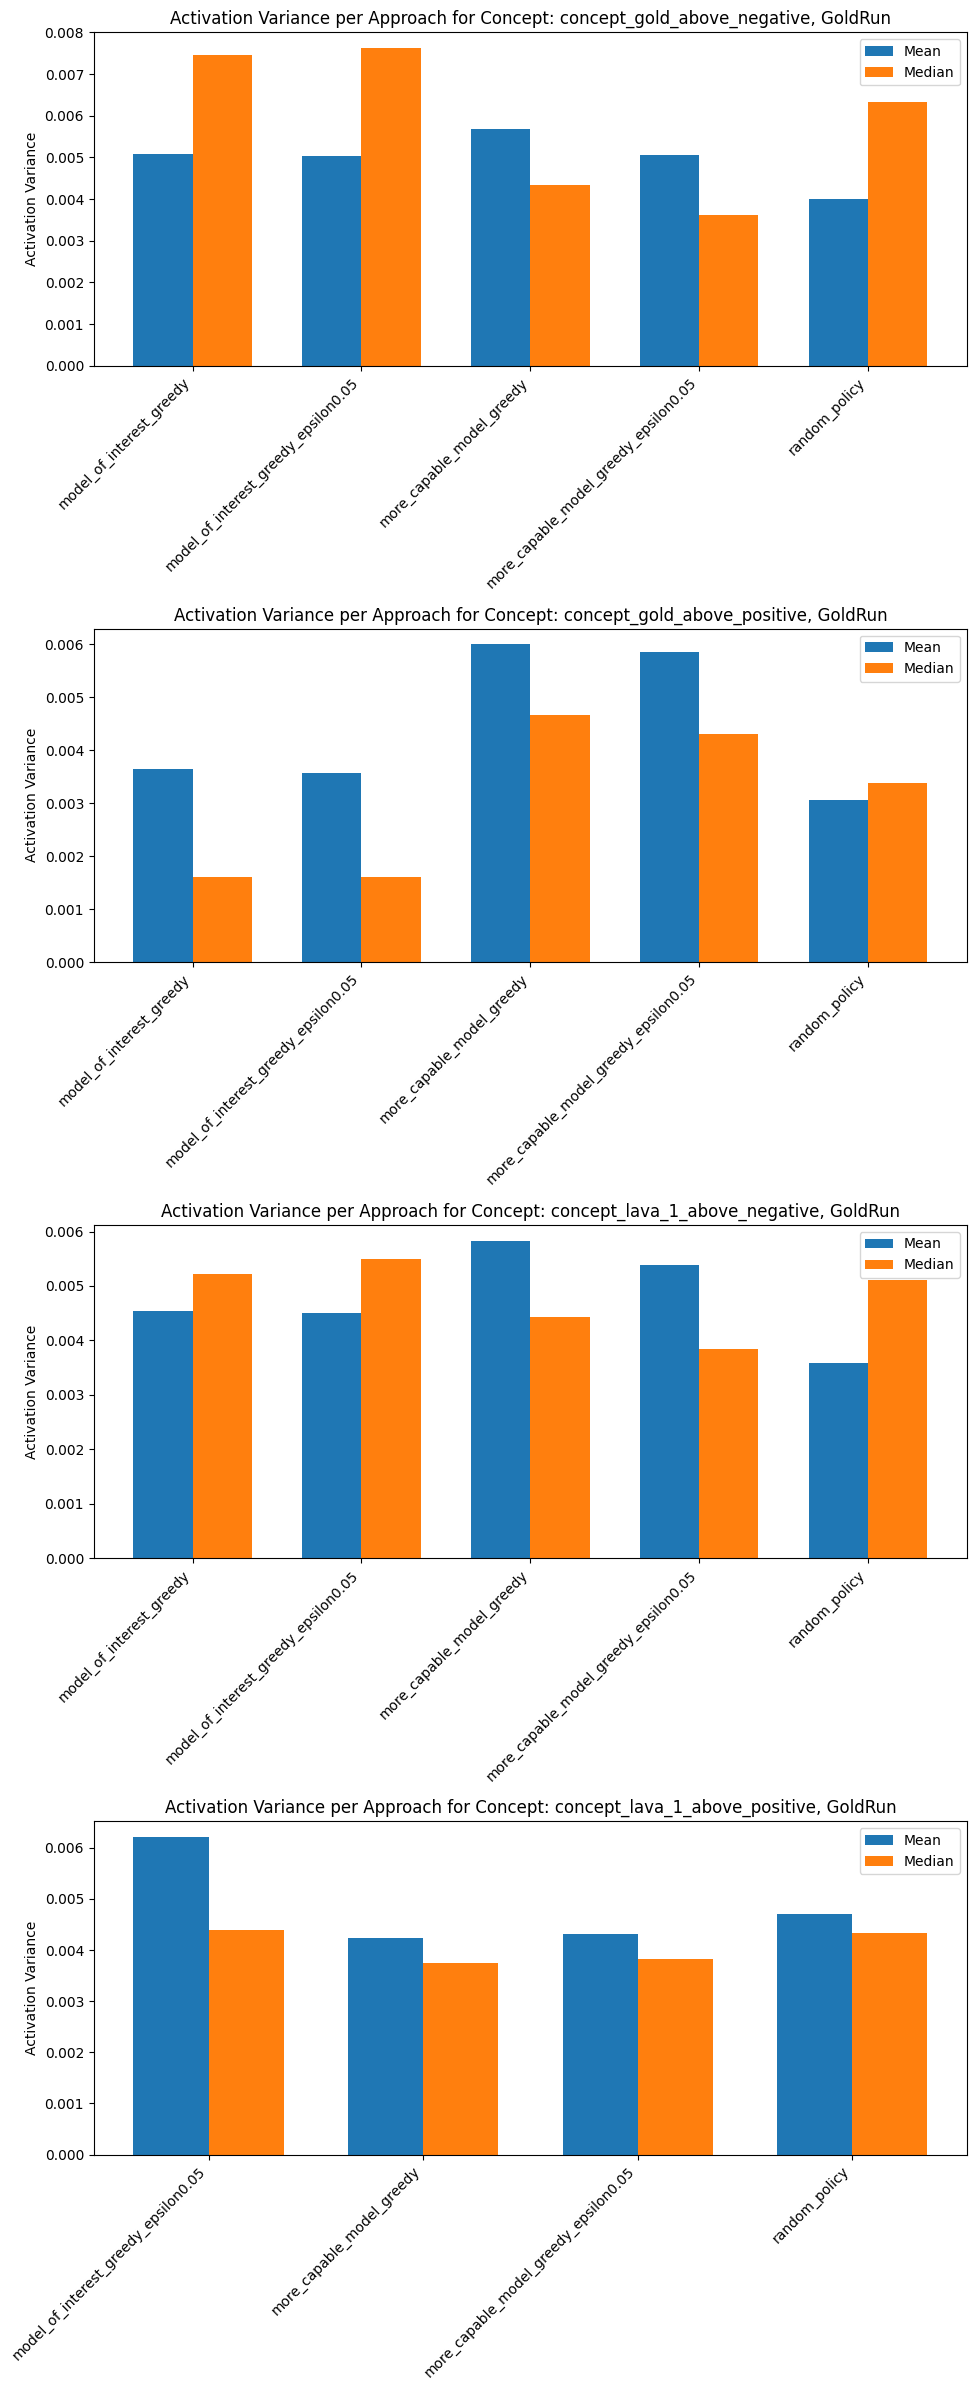

In [41]:
summary_stats = compute_activation_variance_stats(df, group_by_cols=['approach', 'concept'])
print("Summary Statistics by Approach and Concept:")
print(summary_stats)

concepts = summary_stats['concept'].unique()
num_concepts = len(concepts)

fig, axes = plt.subplots(num_concepts, 1, figsize=(10, 6 * num_concepts), squeeze=False)
axes = axes.flatten()

for ax, concept in zip(axes, concepts):
    data = summary_stats[summary_stats['concept'] == concept]
    approaches = data['approach']
    mean_values = data['mean']
    median_values = data['median']
    
    x = np.arange(len(approaches))  
    width = 0.35  
    
    ax.bar(x - width/2, mean_values, width, label='Mean')
    ax.bar(x + width/2, median_values, width, label='Median')
    
    ax.set_title(f"Activation Variance per Approach for Concept: {concept}, GoldRun")
    ax.set_xticks(x)
    ax.set_xticklabels(approaches, rotation=45, ha='right')
    ax.set_ylabel("Activation Variance")
    ax.legend()

plt.tight_layout()
plt.show()